In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Generate a hypothetical time series data
np.random.seed(0)
time = np.arange(100)
data = 20 + 0.5 * time + np.random.normal(scale=10, size=time.size)

# Create a DataFrame
df = pd.DataFrame({'time': time, 'data': data})

In [3]:
df

,time,data
0,0,37.640523
1,1,24.501572
2,2,30.787380
3,3,43.908932
4,4,40.675580
...,...,...
95,95,74.565732
96,96,68.105000
97,97,86.358705
98,98,70.269121


In [4]:
window_size = 5
df['moving_avg'] = df['data'].rolling(window=window_size).mean()

In [5]:
df

,time,data,moving_avg
0,0,37.640523,NaN
1,1,24.501572,NaN
2,2,30.787380,NaN
3,3,43.908932,NaN
4,4,40.675580,35.502797
...,...,...,...
95,95,74.565732,73.440597
96,96,68.105000,71.516707
97,97,86.358705,75.171898
98,98,70.269121,73.972444


In [6]:
df['moving_avg'].fillna(df['data'], inplace=True)

In [7]:
df

,time,data,moving_avg
0,0,37.640523,37.640523
1,1,24.501572,24.501572
2,2,30.787380,30.787380
3,3,43.908932,43.908932
4,4,40.675580,35.502797
...,...,...,...
95,95,74.565732,73.440597
96,96,68.105000,71.516707
97,97,86.358705,75.171898
98,98,70.269121,73.972444


In [9]:
# Forecast for the next 5 time steps
forecast_horizon = 5
last_moving_avg = df['moving_avg'].iloc[-1]
forecast = [last_moving_avg] * forecast_horizon

# Append forecast to the DataFrame
forecast_time = np.arange(time[-1] + 1, time[-1] + 1 + forecast_horizon)
forecast_df = pd.DataFrame({'time': forecast_time, 'forecast': forecast})

In [10]:
forecast_df

,time,forecast
0,100,74.56369
1,101,74.56369
2,102,74.56369
3,103,74.56369
4,104,74.56369


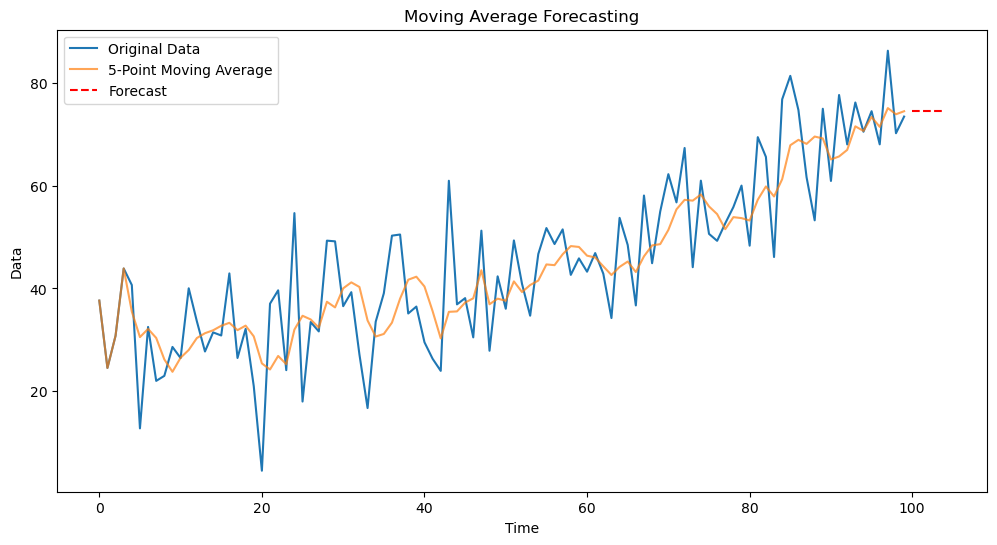

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['data'], label='Original Data')
plt.plot(df['time'], df['moving_avg'], label=f'{window_size}-Point Moving Average', alpha=0.7)
plt.plot(forecast_df['time'], forecast_df['forecast'], label='Forecast', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Moving Average Forecasting')
plt.legend()
plt.show()


# Weighted Moving Average

In [14]:
np.random.seed(0)
time = np.arange(100)
data = 20 + 0.5 * time + np.random.normal(scale=10, size=time.size)

# Create a DataFrame
df = pd.DataFrame({'time': time, 'data': data})

In [15]:
def weighted_moving_average(series, window, weights):
    weights = np.array(weights)
    return series.rolling(window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)


In [16]:
window_size = 5
weights = np.linspace(1, 5, window_size)  # Linearly increasing weights [1, 2, 3, 4, 5]
df['wma'] = weighted_moving_average(df['data'], window_size, weights)

In [17]:
df['wma'].fillna(df['data'], inplace=True)

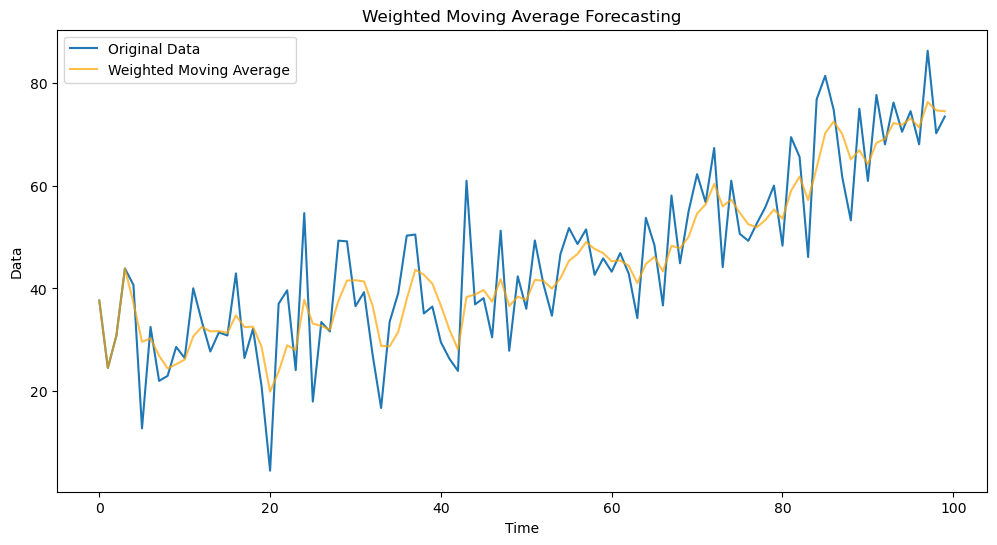

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['data'], label='Original Data')
plt.plot(df['time'], df['wma'], label='Weighted Moving Average', alpha=0.7, color='orange')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Weighted Moving Average Forecasting')
plt.legend()
plt.show()
